In [7]:
import pandas as pd
df_housing = pd.read_csv("./dataset/house.csv")
# df_housing = pd.read_csv("https://raw.githubusercontent.com/huangjia2019/house/master/house.csv")
df_housing.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  ho

In [8]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [9]:
# 构建特征数据集X和标签数据集y
X = df_housing.drop("median_house_value", axis = 1)
y = df_housing.median_house_value

In [12]:
# 将数据分为训练数据集（80%）和测试数据集（20%）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# 线性回归训练模型
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # 确定线性回归算法
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# 预测
y_pred = model.predict(X_test)
print('房价的真值（测试集）：\n',y_test)
print('房价的预测值（测试集）：\n',y_pred)

房价的真值（测试集）：
 3873     171400.0
3625     189600.0
3028     500001.0
13814    229400.0
15398    163400.0
           ...   
1363     212500.0
7947     210500.0
14574    142900.0
10009    128300.0
9149      84700.0
Name: median_house_value, Length: 3400, dtype: float64
房价的预测值（测试集）：
 [211157.06335418 218581.64298574 465317.31295564 ... 201751.2396963
 160873.51846959 138847.26913352]


In [17]:
# 预测评分
print("预测评分：", model.score(X_test, y_test))

预测评分： 0.6321014171579478


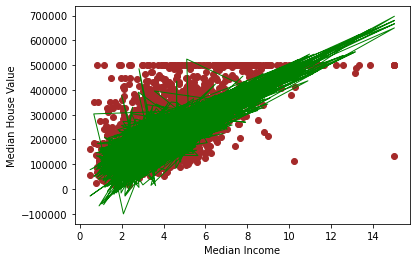

In [18]:
import matplotlib.pyplot as plt
# 散点图显示家庭收入中位数和房价中位数分布
plt.scatter(X_test.median_income, y_test, color='brown')
# 画出回归函数
plt.plot(X_test.median_income, y_pred, color='green', linewidth=1)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()